In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('People_Covered_in_the_News/people_2014.csv')

In [3]:
def custom_standardization(df):

    spec_chars = ["!",'"',"#","%","&","'","(",")", "*","+",",",
                  "-",".","/",":",";","<", "=",">","?","@","[",
                  "\\","]","^","_", "`","{","|","}","~","–", 
                  "\xc2", "\xa0", "\x80", "\x9c", "\x99", "\x94", 
                  "\xad", "\xe2", "\x9d", "\n"]

    for char in spec_chars:
        df['article'] = df['article'].str.strip()
        #data['text'] = str(data['text']).lower()
        df['article'] = df['article'].str.replace(char, ' ')
        #data['text'] = stemmer.stem(str(data['text']))
        
    return df

In [4]:
data = custom_standardization(data)
data = data[data['race'] == 'black']

In [5]:
#1103 in data.index

In [6]:
# turn DataFrame into a list of lists of tokens
documents = ''

for ind in data.index:
    temp = data.loc[ind]['article']
    temp = temp.lower().split()
    for word in temp:
        documents = documents + ' ' + word
    #print(len(documents))

In [7]:
black_df = data[data['race'] == 'black']
names_list = black_df['last_name'].tolist()
names_list = list(set(names_list))
for i in range(len(names_list)):
    names_list[i] = names_list[i].lower()

In [8]:
names_list

['washington',
 'joseph',
 'peoples',
 'allston',
 'mohamed',
 'nwachukwu',
 'jenji',
 'josiah',
 'muhammad',
 'sununu',
 'jackson']

### PROBLEM: ethnicolr predicts a disproportionately low number of names to belong to black people; as a result, all the results are erroneous

### POSSIBLE SOLUTION: in addition to the functions provided with the ethnicolr package, I found out that its creators seem to have created some prediction models on their own which supposedly have higher accuracy, so I could look into that

In [9]:
# just using the sentence, which words surround black names?
# use: https://peekaboo-vision.blogspot.com/2012/11/a-wordcloud-in-python.html
# http://amueller.github.io/word_cloud/
# don't need to run Word2Vec

# perhaps, 'black' race predictions are low, but not as low as it seems since coverage 
# might have to do with the general picture, not specific individuals

In [10]:
#from wordcloud import WordCloud

# Generate a word cloud image
#wordcloud = WordCloud().generate(documents)

In [11]:
# Display the generated image:
# the matplotlib way:
# import matplotlib.pyplot as plt
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis("off")

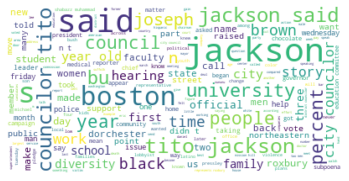

In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# lower max_font_size
wordcloud = WordCloud(max_font_size=40, background_color='white').generate(documents)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
#plt.savefig('Black_Ents_Clouds/cloud_2014.png')
wordcloud.to_file('Black_Ents_Clouds/cloud_2014.png')
plt.show()

In [13]:
#plt.savefig('Black_Ents_Clouds/cloud_2014.png')